In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
#reading three datasets 
movie_data=pd.read_csv("/home/user/Project/Project4_Movielens/movies.dat",sep="::",names=["MovieID","Title","Genres"])
user_data=pd.read_csv("/home/user/Project/Project4_Movielens/users.dat",sep="::",names=["UserID", "Gender", "Age", "Occupation","Zip-code"])
rating_data=pd.read_csv("/home/user/Project/Project4_Movielens/ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"])

In [67]:
#Descriptive statistics of User_data

In [68]:
user_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [69]:
user_data.tail()

,UserID,Gender,Age,Occupation,Zip-code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [70]:
user_data.shape

(6040, 5)

In [71]:
user_data.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')

In [72]:
user_data.dtypes

UserID         int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [73]:
user_data.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [74]:
user_data.isna().sum()  #missing values checking

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [75]:
#Descriptive statistics of movie_data

In [76]:
movie_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [77]:
movie_data.columns

Index(['MovieID', 'Title', 'Genres'], dtype='object')

In [78]:
movie_data.shape

(3883, 3)

In [79]:
movie_data.dtypes

MovieID     int64
Title      object
Genres     object
dtype: object

In [80]:
movie_data.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [81]:
movie_data.isna().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [82]:
#Descriptive statistics of rating_data

In [83]:
rating_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [84]:
rating_data.shape

(1000209, 4)

In [85]:
rating_data.dtypes

UserID       int64
MovieID      int64
Rating       int64
Timestamp    int64
dtype: object

In [86]:
rating_data.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [87]:
rating_data.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

# Visualize user age distribution

<function matplotlib.pyplot.show(close=None, block=None)>

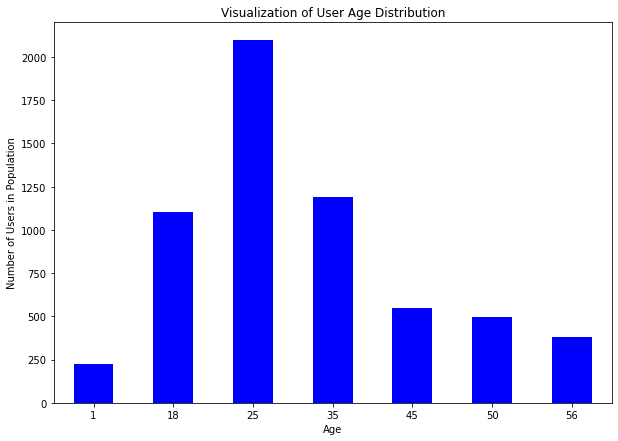

In [88]:
user_data.groupby('Age')['UserID'].count().plot(kind = 'bar', color = 'blue',figsize = (10,7))
plt.xlabel('Age')
plt.ylabel('Number of Users in Population')
plt.title('Visualization of User Age Distribution')
plt.xticks(rotation=0)
plt.show

from the above graph, most of the users are 25years old

# Visualize overall rating by users


<function matplotlib.pyplot.show(close=None, block=None)>

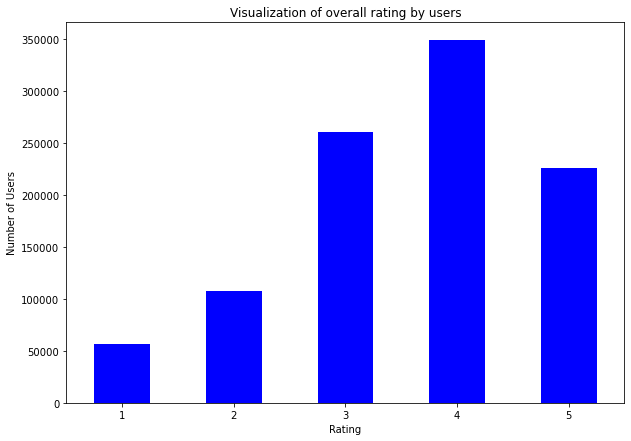

In [89]:
rating_data.groupby('Rating')['UserID'].count().plot(kind = 'bar', color = 'blue',figsize = (10,7))
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.title('Visualization of overall rating by users')
plt.xticks(rotation=0)
plt.show

The highest rating is 4 and then followed by rating 3 and then rating 5

# Find and visualize the user rating of the movie “Toy Story”

In [90]:
rating_data[rating_data.MovieID ==1].groupby('Rating')['UserID'].count() #based on usedid

Rating
1     16
2     61
3    345
4    835
5    820
Name: UserID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

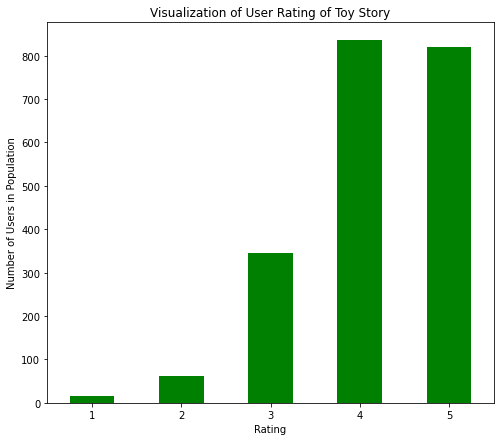

In [102]:
rating_data[rating_data.MovieID ==1].groupby('Rating')['UserID'].count().plot(kind = 'bar', color = 'green',figsize = (8,7))
plt.xlabel('Rating')
plt.ylabel('Number of Users in Population')
plt.title('Visualization of User Rating of Toy Story')
plt.xticks(rotation=0)
plt.show

From above chart, movie Toy Story has rating 4

In [103]:
#by using movie name 
merge_movierating_data=pd.merge(movie_data,rating_data,on='MovieID',how='inner') #merging 2 datas

In [104]:
merge_movierating_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [113]:
merge_movierating_data.shape

(1000209, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

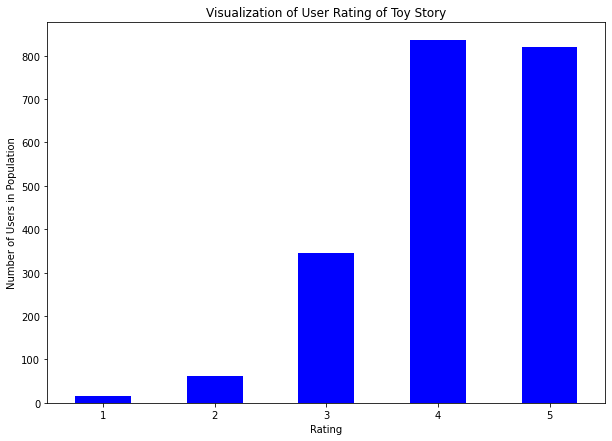

In [105]:
merge_movierating_data[merge_movierating_data.Title == 'Toy Story (1995)'].groupby('Rating')['UserID'].count().plot(kind = 'bar', color = 'blue',figsize = (10,7))
plt.xlabel('Rating')
plt.ylabel('Number of Users in Population')
plt.title('Visualization of User Rating of Toy Story')
plt.xticks(rotation=0)
plt.show

# Find and visualize the viewership of the movie “Toy Story” by age group

In [109]:
merge_userdata=pd.merge(merge_movierating_data,user_data,on='UserID',how='inner')

In [111]:
merge_userdata.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [112]:
merge_userdata.shape

(1000209, 10)

In [115]:
viewership=merge_userdata[merge_userdata['Title']=='Toy Story (1995)']
viewership

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370
...,...,...,...,...,...,...,...,...,...,...
575166,1,Toy Story (1995),Animation|Children's|Comedy,6022,5,956755763,M,25,17,57006
575214,1,Toy Story (1995),Animation|Children's|Comedy,6025,5,956812867,F,25,1,32607
575485,1,Toy Story (1995),Animation|Children's|Comedy,6032,4,956718127,M,45,7,55108
575589,1,Toy Story (1995),Animation|Children's|Comedy,6035,4,956712849,F,25,1,78734


In [117]:
viewership.groupby('Age').size()

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

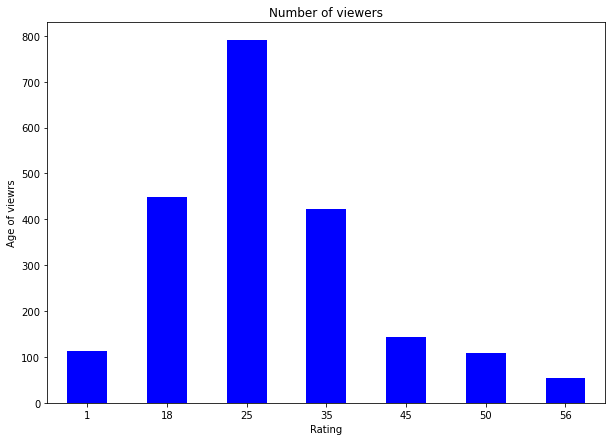

In [120]:
viewership.groupby('Age')['UserID'].count().plot(kind = 'bar', color = 'blue',figsize = (10,7))
plt.xlabel('Rating')
plt.ylabel('Age of viewrs')
plt.title('Number of viewers')
plt.xticks(rotation=0)
plt.show

# Find and visualize the top 25 movies by viewership rating

In [122]:
merge_userdata.groupby('Title')['Rating'].count().sort_values(ascending = False)[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

# Find the rating for a particular user of user id = 2696

In [130]:
merge_userdata[merge_userdata.UserID==2696].groupby('Rating') ['UserID'].count()

Rating
1     2
2     3
3     3
4    11
5     1
Name: UserID, dtype: int64

In [131]:
user_2696_data=merge_userdata[merge_userdata.UserID == 2696]
user_2696_data

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


<function matplotlib.pyplot.show(close=None, block=None)>

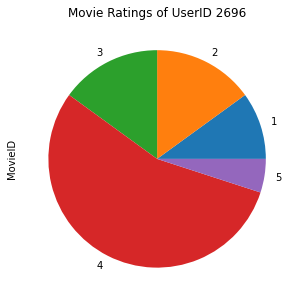

In [133]:
#Visualize the rating data by user of user id = 2696#
user = merge_userdata[merge_userdata.UserID == 2696].groupby('Rating')['MovieID'].count().plot(kind = 'pie',figsize = (8,5))
plt.title('Movie Ratings of UserID 2696')
plt.show

# Perform machine learning on first 500 extracted records

In [134]:
ml_data=merge_userdata.head(500)

In [136]:
ml_data.shape

(500, 10)

In [137]:
ml_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [149]:
ml_data.tail()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
495,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,10,5,979167660,F,35,1,95370
496,1198,Raiders of the Lost Ark (1981),Action|Adventure,10,5,978225630,F,35,1,95370
497,1200,Aliens (1986),Action|Sci-Fi|Thriller|War,10,5,979168160,F,35,1,95370
498,1201,"Good, The Bad and The Ugly, The (1966)",Action|Western,10,2,978225853,F,35,1,95370
499,1203,12 Angry Men (1957),Drama,10,3,979775159,F,35,1,95370


In [150]:
ml_data.dtypes

MovieID        int64
Title         object
Genres        object
UserID         int64
Rating         int64
Timestamp      int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [151]:
ml_data.describe()

,MovieID,UserID,Rating,Timestamp,Age,Occupation
count,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000
mean,1428.202000,7.710000,3.962000,9.783397e+08,28.626000,9.540000
std,1087.682254,2.636627,0.859088,3.402670e+05,12.774369,5.719951
min,1.000000,1.000000,1.000000,9.782244e+08,1.000000,1.000000
25%,542.750000,8.000000,3.000000,9.782266e+08,25.000000,1.000000
50%,1094.000000,8.000000,4.000000,9.782301e+08,25.000000,10.000000
75%,2291.750000,10.000000,5.000000,9.782375e+08,35.000000,12.000000
max,3948.000000,10.000000,5.000000,9.806386e+08,50.000000,17.000000


In [152]:
ml_data.isna().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [161]:
x = ml_data[['MovieID','Age','Occupation']].values #features

In [164]:
y=ml_data['Rating'].values  #labels

In [167]:
#Create train and test data se
from sklearn.model_selection import train_test_split    
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

Text(0.5, 0, 'Ratings')

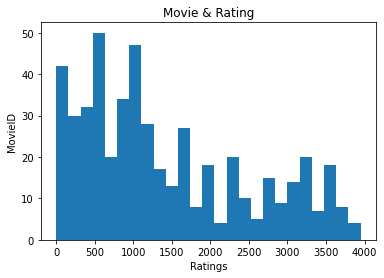

In [170]:
#Create a histogram for movie
ml_data.MovieID.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

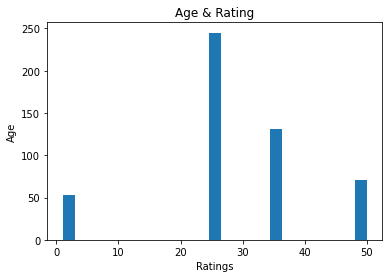

In [172]:
#Create a histogram for age
ml_data.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

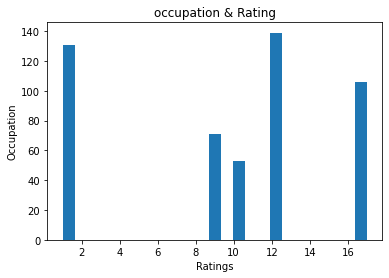

In [174]:
#Create a histogram for occupation
ml_data.Occupation.plot.hist(bins=25)
plt.title("occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')